# Assignment 3 ML Data Product
Author: **Panalee Makha 14367914**

The task is to build a data product that will help users in the USA to better estimate their local travel airfare. Users will be able to provide details of their trip and the app will predict the expected flight fare.
We used `MSE` and `MAE` as the metric for the model performance.

# Table of Content
1. [Import dataset]()
2. [Baseline model]()
3. [Train Models]()

        3.1 Linear regression
        3.2 Ridge
        3.3 ElasticNetCV
        3.4 KNeighbors
         3.4.1 KNN default
         3.4.2 KNN Hyperparameters tunning        
        3.5 Gradient Boosting
4. [Best Model]()

## 1. Import dataset

In [1]:
import sys
sys.path.insert(0, '../../src')
import pandas as pd
import numpy as np

In [2]:
from data.make_dataset import *
X_train, y_train, X_val, y_val, X_test, y_test = load_sets(path='../../data/processed/')

In [3]:
print(X_train.shape), print(y_train.shape)

(8111999, 12)
(8111999,)


(None, None)

In [4]:
print(X_val.shape), print(y_val.shape)

(2704000, 12)
(2704000,)


(None, None)

In [6]:
print(X_test.shape), print(y_test.shape)

(2704000, 12)
(2704000,)


(None, None)

## 2. Baseline model

In [5]:
from models.null import NullRegressor
from models.predict_model import print_regressor_scores

In [64]:
base_model = NullRegressor()
y_base = base_model.fit_predict(y_train)
print_regressor_scores(y_preds=y_base, y_actuals=y_train, set_name='Training')

MSE Training: 1.0008648851928268
MAE Training: 0.7466010716968183
R2_score Training: 0.0


## 3. Train Models

In [6]:

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

### 3.1 Linear regression

In [66]:
lr = LinearRegression()

In [67]:
lr.fit(X_train, y_train)

LinearRegression()

In [68]:
y_pred_lr = lr.predict(X_train)
y_pred_lr_val = lr.predict(X_val)

print_regressor_scores(y_pred_lr,y_train,set_name='Training')

MSE Training: 0.5797947093319961
MAE Training: 0.5339013787088485
R2_score Training: 0.420706


In [69]:
print_regressor_scores(y_pred_lr_val,y_val,set_name='Validation')

MSE Validation: 0.5758296803478751
MAE Validation: 0.5334993698926779
R2_score Validation: 0.421933


### 3.2 Rigde

In [70]:
param_grid = {
    'alpha': [0.1, 1.0, 10.0]
}

# Create the Ridge model
ridge_model = Ridge()

# Create the GridSearchCV object
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_absolute_error')

In [71]:
# Get the best hyperparameters from the grid search
best_alpha = grid_search.best_params_['alpha']

# Get the best Ridge model
best_ridge_model = grid_search.best_estimator_
best_ridge_model

Ridge(alpha=10.0)

In [72]:
y_pred_rd_t = best_ridge_model.predict(X_train)
y_pred_rd_val = best_ridge_model.predict(X_val)

In [73]:
print_regressor_scores(y_pred_rd_t,y_train,set_name='Training')

MSE Training: 0.5797947093498554
MAE Training: 0.5339012467864863
R2_score Training: 0.420706


In [74]:
print_regressor_scores(y_pred_rd_val,y_val,set_name='Validation')

MSE Validation: 0.5758296777111511
MAE Validation: 0.5334992382406365
R2_score Validation: 0.421933


### 3.3 ElasticNetCV

In [75]:
elasticnet_model = ElasticNetCV(cv=5)  # cross-validation folds
elasticnet_model.fit(X_train, y_train)

ElasticNetCV(cv=5)

In [76]:
y_predt_elas = elasticnet_model.predict(X_train)
y_predv_elas = elasticnet_model.predict(X_val)

In [77]:
print_regressor_scores(y_predt_elas,y_train,set_name='Training')

MSE Training: 0.5799352635870615
MAE Training: 0.533719626884408
R2_score Training: 0.420566


In [78]:
print_regressor_scores(y_predv_elas,y_val,set_name='Validation')

MSE Validation: 0.5759680777159685
MAE Validation: 0.5333240964458702
R2_score Validation: 0.421794


### 3.4 KNeighbors

#### 3.4.1 KNN Default

In [79]:
knn0 = KNeighborsRegressor()
knn0.fit(X_train, y_train)

KNeighborsRegressor()

In [80]:
y_predt_knn0 = knn0.predict(X_train)
y_predv_knn0 = knn0.predict(X_val)

In [81]:
print_regressor_scores(y_predt_knn0,y_train,set_name='Training')

MSE Training: 0.21086204154450128
MAE Training: 0.2886026235149159
R2_score Training: 0.78932


In [82]:
print_regressor_scores(y_predv_knn0,y_val,set_name='Validation')

MSE Validation: 0.22950249114460528
MAE Validation: 0.2992897143886497
R2_score Validation: 0.769606


#### 3.4.2 KNN Hyperparameters tunning

**[3.4.2.1]** __neighbors__ with __weights='uniform',p=1__

* n_neighbors = 3

In [83]:
knn1 = KNeighborsRegressor(n_neighbors=3, weights='uniform',p=1)

In [84]:
knn1.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3, p=1)

In [85]:
y_predt_knn1 = knn1.predict(X_train)
y_predv_knn1 = knn1.predict(X_val)

In [86]:
print_regressor_scores(y_predt_knn1,y_train,set_name='Training')

MSE Training: 0.22689346780849887
MAE Training: 0.2985561514379969
R2_score Training: 0.773303


In [87]:
print_regressor_scores(y_predv_knn1,y_val,set_name='Validation')

MSE Validation: 0.2472002908678711
MAE Validation: 0.3103953942965042
R2_score Validation: 0.751839


* n_neighbors = 5

In [88]:
knn2 = KNeighborsRegressor(n_neighbors=5, weights='uniform',p=1)

In [89]:
knn2.fit(X_train,y_train)

KNeighborsRegressor(p=1)

In [90]:
y_predt_knn2 = knn2.predict(X_train)
y_predv_knn2 = knn2.predict(X_val)

In [91]:
print_regressor_scores(y_predt_knn2,y_train,set_name='Training')

MSE Training: 0.2106519096406004
MAE Training: 0.28851670394012663
R2_score Training: 0.78953


In [92]:
print_regressor_scores(y_predv_knn2,y_val,set_name='Validation')

MSE Validation: 0.22908974023913908
MAE Validation: 0.2991453010843101
R2_score Validation: 0.77002


* n_neighbors = 7

In [93]:
knn3 = KNeighborsRegressor(n_neighbors=7, weights='uniform',p=1)

In [94]:
knn3.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=7, p=1)

In [95]:
y_predt_knn3 = knn3.predict(X_train)
y_predv_knn3 = knn3.predict(X_val)

In [96]:
print_regressor_scores(y_predt_knn3,y_train,set_name='Training')

MSE Training: 0.20673803854627698
MAE Training: 0.2854750925942013
R2_score Training: 0.793441


In [97]:
print_regressor_scores(y_predv_knn3,y_val,set_name='Validation')

MSE Validation: 0.2237905743167268
MAE Validation: 0.29528471956271546
R2_score Validation: 0.77534


* n_neighbors = 9

In [7]:
knn4 = KNeighborsRegressor(n_neighbors=9, weights='uniform',p=1)

In [8]:
knn4.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=9, p=1)

In [100]:
y_predt_knn4 = knn4.predict(X_train)
y_predv_knn4 = knn4.predict(X_val)

In [101]:
print_regressor_scores(y_predt_knn4,y_train,set_name='Training')

MSE Training: 0.20617295706992672
MAE Training: 0.284524113772312
R2_score Training: 0.794005


In [102]:
print_regressor_scores(y_predv_knn4,y_val,set_name='Validation')

MSE Validation: 0.22214024746891006
MAE Validation: 0.2937953365697721
R2_score Validation: 0.776997


### 3.5 Gradient Boosting 

In [103]:
gbr = GradientBoostingRegressor(random_state=42)

In [104]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [105]:
y_predt_gbr = gbr.predict(X_train)
y_predv_gbr = gbr.predict(X_val)

In [106]:
print_regressor_scores(y_predt_gbr,y_train,set_name='Training')

MSE Training: 0.4366272059715127
MAE Training: 0.46549381168591236
R2_score Training: 0.56375


In [107]:
print_regressor_scores(y_predv_gbr,y_val,set_name='Validation')

MSE Validation: 0.435358341010421
MAE Validation: 0.46520639055619195
R2_score Validation: 0.56295


## 4. Best Model

The optimal model is the __KNN4__ or the `KNeighborsRegressor` with specific hyperparameters: `neighbors = 9`, `weights='uniform'`, and `p=1`. This model achieved the lowest Mean Squared Error (MSE) of `0.20617295706992672` on the training set and `0.22214024746891006` on the validation set.

**[4.1] Result Comparison of each model**

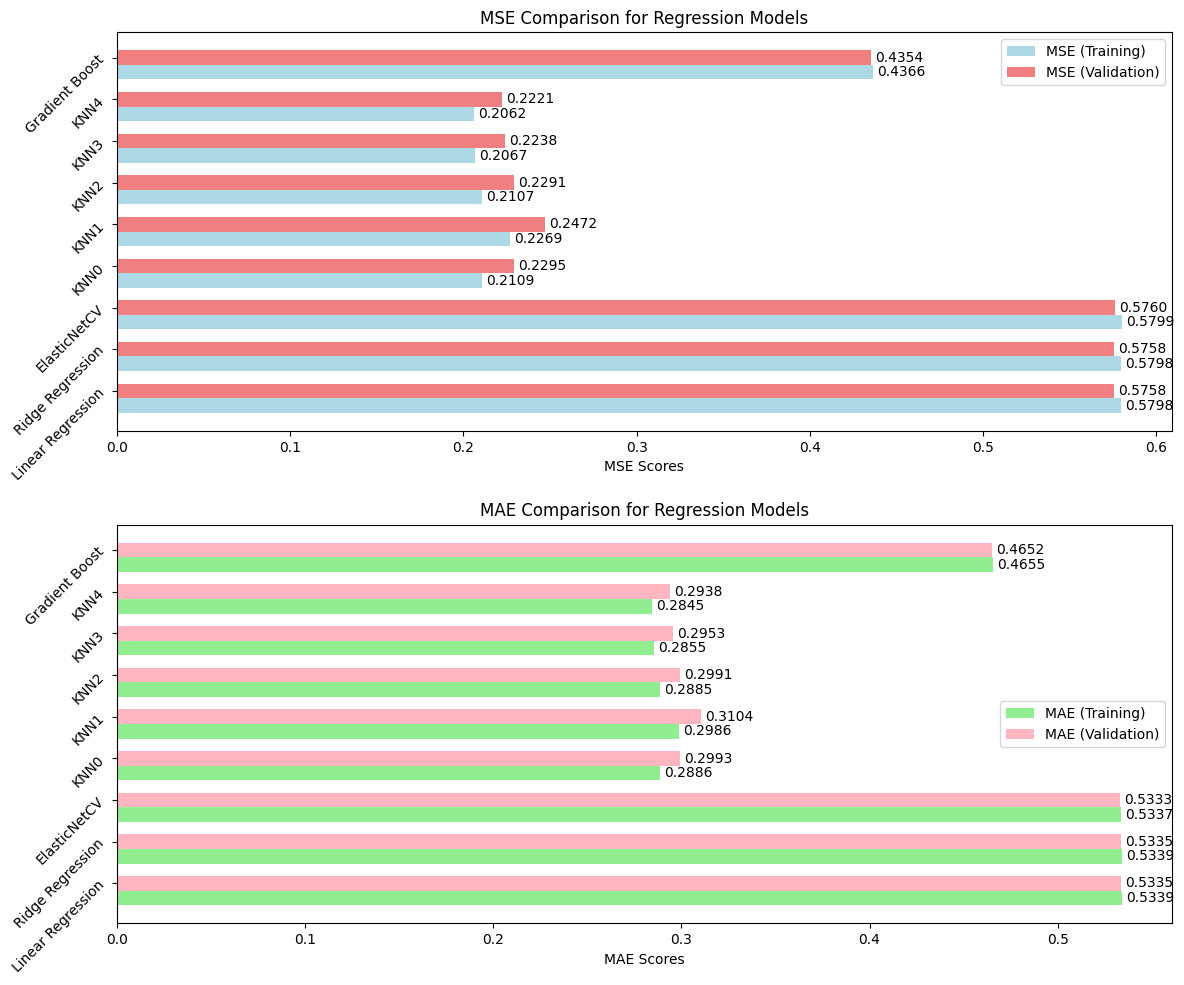

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Define the regression models and their corresponding MSE and MAE values
models = ['Linear Regression', 'Ridge Regression', 'ElasticNetCV', 'KNN0', 'KNN1', 'KNN2', 'KNN3', 'KNN4', 'Gradient Boost']
mse_training = [0.5797947093319961, 0.5797947093498554, 0.5799352635870615, 0.21086204154450128, 0.22689346780849887, 0.2106519096406004, 0.20673803854627698, 0.20617295706992672, 0.4366272059715127]
mae_training = [0.5339013787088485, 0.5339012467864863, 0.533719626884408, 0.2886026235149159, 0.2985561514379969, 0.28851670394012663, 0.2854750925942013, 0.284524113772312, 0.46549381168591236]
mse_validation = [0.5758296803478751, 0.5758296777111511, 0.5759680777159685, 0.22950249114460528, 0.2472002908678711, 0.22908974023913908, 0.2237905743167268, 0.22214024746891006, 0.435358341010421]
mae_validation = [0.5334993698926779, 0.5334992382406365, 0.5333240964458702, 0.2992897143886497, 0.3103953942965042, 0.2991453010843101, 0.29528471956271546, 0.2937953365697721, 0.46520639055619195]

# Create a range for the y-axis
y = np.arange(len(models))

# Set the height of the bars
bar_height = 0.35

# Create subplots for MSE and MAE separately
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Define custom colors for each set of bars
mse_training_color = 'lightblue'
mse_validation_color = 'lightcoral'
mae_training_color = 'lightgreen'
mae_validation_color = 'lightpink'

# Create horizontal bar charts for MSE
mse_training_bars = ax1.barh(y - bar_height, mse_training, bar_height, label='MSE (Training)', color=mse_training_color)
mse_validation_bars = ax1.barh(y, mse_validation, bar_height, label='MSE (Validation)', color=mse_validation_color)

# Create horizontal bar charts for MAE
mae_training_bars = ax2.barh(y - bar_height, mae_training, bar_height, label='MAE (Training)', color=mae_training_color)
mae_validation_bars = ax2.barh(y, mae_validation, bar_height, label='MAE (Validation)', color=mae_validation_color)

# Set y-axis labels and rotate for better readability
ax1.set_yticks(y)
ax2.set_yticks(y)
ax1.set_yticklabels(models, rotation=45)
ax2.set_yticklabels(models, rotation=45)

# Set x-axis labels
ax1.set_xlabel('MSE Scores')
ax2.set_xlabel('MAE Scores')

# Set chart titles
ax1.set_title('MSE Comparison for Regression Models')
ax2.set_title('MAE Comparison for Regression Models')

# Add legends
ax1.legend()
ax2.legend(loc='center right')

# Function to add values next to the bars
def add_values(bars, ax):
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{width:.4f}', xy=(width, bar.get_y() + bar.get_height() / 2), xytext=(3, 0), textcoords="offset points", va='center')

# Add values next to the bars
add_values(mse_training_bars, ax1)
add_values(mse_validation_bars, ax1)
add_values(mae_training_bars, ax2)
add_values(mae_validation_bars, ax2)


# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()


**[4.2] Save the best model**

In [5]:
knn_best = KNeighborsRegressor(n_neighbors=9, weights='uniform',p=1)

In [9]:
import joblib 

Best KNN without fitting training dataset

In [6]:
joblib.dump(knn_best,'../../models/knn.joblib')

['../../models/knn.joblib']

Best KNN fitting training dataset

In [15]:
joblib.dump(knn4,'../../models/knn_fit.joblib')

['../../models/knn_fit.joblib']

Best KNN zip

In [14]:
joblib.dump(knn4, '../../models/knn_fit.joblib.zip', compress=9)

['../../models/knn_fit.joblib.zip']

**Note**: Due to the large file size of the KNN model files, knn_fit.joblib and knn_fit.joblib.zip, they cannot be uploaded to GitHub. The best KNN model, which is saved in the models folder, does not include fitted data. You can access the KNN model file, including the fitted data, through the following Google Drive link: https://drive.google.com/drive/folders/12lSspcn9g2bXIPBGeUGjVq1uTjT2XJup?usp=drive_link 

**[4.3] Training the best model on Test set**

In [16]:
y_pred_test = knn4.predict(X_test)

In [17]:
print_regressor_scores(y_pred_test,y_test,set_name='Test')

MSE Test: 0.22154418857678332
MAE Test: 0.29403444429653136
R2_score Test: 0.778738


**[4.4] Model Prediction Comparison**

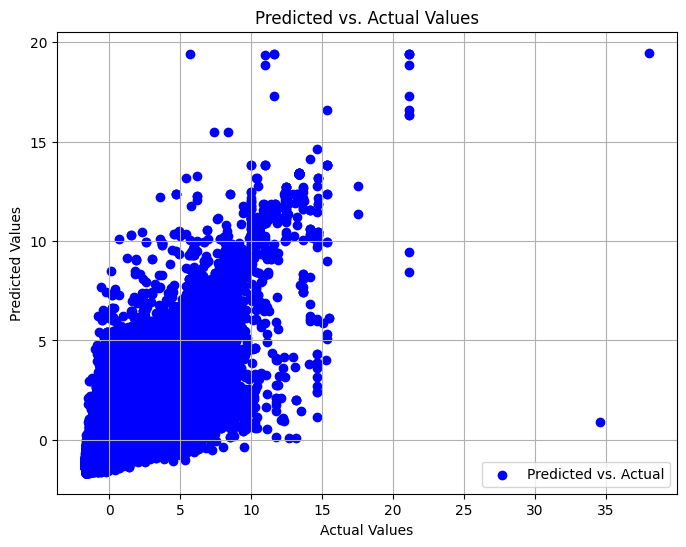

In [18]:
import matplotlib.pyplot as plt

# Create a scatter plot for comparison
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, c='blue', label='Predicted vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.grid()
plt.show()